# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [1]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

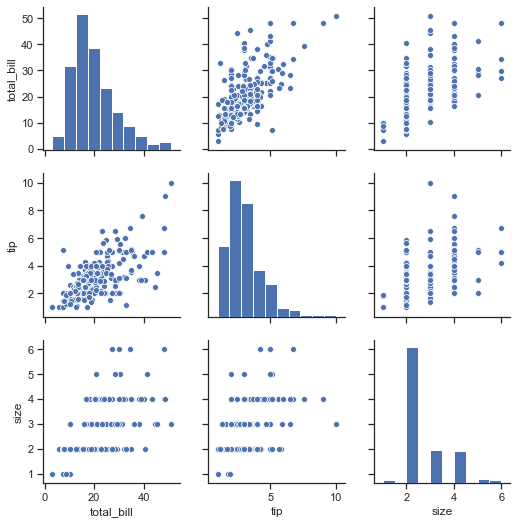

In [8]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(tips)

#total_bill vs. tip seems most helpful, size vs. tip maybe useful, I do not belive the others will be usefull as there is less
#variation in the xvalues (sex only has 2 different values as does smoker and day only has 4)

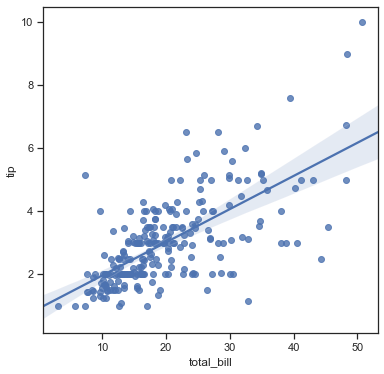

In [10]:
plt.figure(figsize=(6,6))
sns.regplot('total_bill', 'tip', data=tips)
plt.show()

In [20]:
x = sm.add_constant(tips[['total_bill']])
y = tips.tip

lm = sm.OLS(y, x).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((tips.tip - np.mean(tips.tip)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.69e-34
Time:                        10:59:30   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

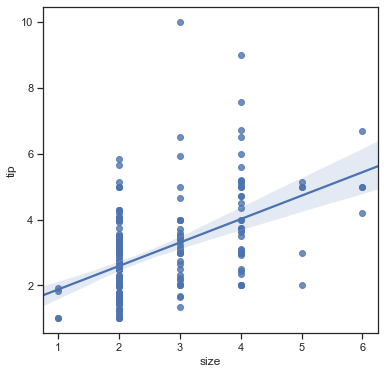

In [18]:
plt.figure(figsize=(6,6))
sns.regplot('size', 'tip', data=tips)
plt.show()

In [21]:
x = sm.add_constant(tips[['size']])
y = tips.tip

lm = sm.OLS(y, x).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((tips.tip - np.mean(tips.tip)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     76.18
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           4.30e-16
Time:                        10:59:48   Log-Likelihood:                -391.56
No. Observations:                 244   AIC:                             787.1
Df Residuals:                     242   BIC:                             794.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1691      0.223      5.233      0.000       0.729       1.609
size           0.7118      0.082      8.728      0.000       0.551       0.872
==============================================================================
Omnibus:                       81.369   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.339
Skew:                           1.393   Prob(JB):                     4.42e-60
Kurtosis:                       7.373   Cond. No.                         8.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
x = sm.add_constant(tips[['total_bill', 'size']])
y = tips.tip

lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           9.67e-34
Time:                        11:03:38   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

tips(total_bill,size)= 0.6689 + (0.0927total_bill) + 0.1926(size)

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

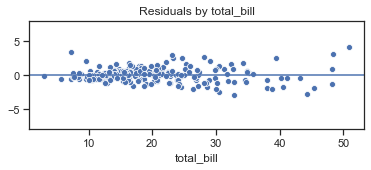

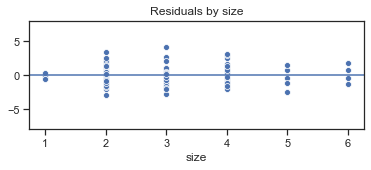

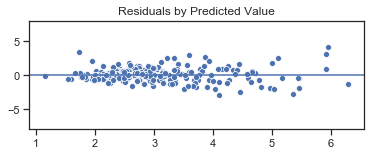

Mean:  -1.9456203497119547e-15


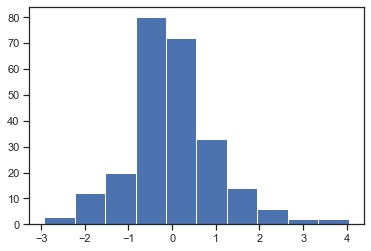

In [27]:
for x in ('total_bill', 'size'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(tips[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-8, 8)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-8, 8)
plt.axhline(np.mean(lm.resid))
plt.show()

print("Mean: ",np.mean(lm.resid))
plt.hist(lm.resid)
plt.show()

4) Does your model meet the four assumptions expected of a linear model? Explain:

The model does meet the four assumptions expected of a linear model

1. The mean is very close to zero (approximately -0.00000000000000195)
2. The residual does have constant variance as there are no spots in the graph where there is a very large change in the spread of the points vertically when compared to the 0 marking line.
3. The points have a normal distribution with the most concentrated area of points closer to zero on the y=-axis with less points getting closer to 5.
4. There does not seem to be a realtionshiop between the input values and the residuals.